In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics


In [2]:
rain=pd.read_csv('data/rain_data_aus.csv')

In [3]:
rain.isna().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
dtype: int64

In [4]:
rain=rain.dropna()

In [5]:
rain[['raintomorrow','raintoday']]

,raintomorrow,raintoday
5939,No,No
5940,No,No
5942,No,No
5943,No,No
5944,No,No
...,...,...
139108,No,No
139109,No,No
139110,No,No
139111,No,No


In [6]:
rain['raintomorrow']=rain['raintomorrow'].replace({'No':0,'Yes':1})
rain['raintoday']=rain['raintoday'].replace({'No':0,'Yes':1})

In [7]:
rain[['raintomorrow','raintoday']]

,raintomorrow,raintoday
5939,0,0
5940,0,0
5942,0,0
5943,0,0
5944,0,0
...,...,...
139108,0,0
139109,0,0
139110,0,0
139111,0,0


In [8]:
rain.corr()['raintomorrow']

mintemp             0.088964
maxtemp            -0.144498
rainfall            0.253773
evaporation        -0.127257
sunshine           -0.449261
humidity9am         0.265360
humidity3pm         0.447742
pressure9am        -0.255934
pressure3pm        -0.231428
cloud9am            0.319410
cloud3pm            0.389891
temp9am            -0.016180
temp3pm            -0.181295
raintoday           0.308621
amountOfRain        0.492611
raintomorrow        1.000000
temp               -0.112636
humidity            0.406002
precipitation3pm    0.006578
precipitation9am   -0.013366
modelo_vigente      0.863107
Name: raintomorrow, dtype: float64

In [9]:
#amountOfRain -> maior correlação

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [11]:
#Tentativa 1
#X=rain[['amountOfRain']]
#y=rain['raintomorrow']

In [12]:
#Tentativa  2
#X=rain[['sunshine']]
#y=rain['raintomorrow']

In [13]:
rain.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente'],
      dtype='object')

In [14]:
#Tentativa  3
X=rain[[ 'mintemp', 'maxtemp', 'rainfall','evaporation','sunshine',
        'humidity9am', 'humidity3pm','pressure9am', 'pressure3pm',
        'cloud9am', 'cloud3pm', 'temp9am','temp3pm', 'raintoday',
        'temp','humidity', 'precipitation3pm','precipitation9am']]
y=rain['raintomorrow']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
tree=DecisionTreeClassifier()
tree

DecisionTreeClassifier()

In [17]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
tree.score(X_test,y_test)

0.7873869509043928

In [19]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

confusion_matrix(y_test, tree.predict(X_test))

array([[8325, 1316],
       [1317, 1426]], dtype=int64)

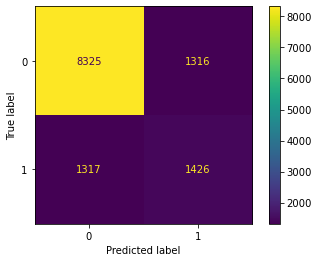

In [20]:
plot_confusion_matrix(tree, X_test, y_test, values_format='.0f')
plt.grid(False)

In [21]:
tree=DecisionTreeClassifier(max_depth=9)
tree.fit(X_train,y_train)
tree.score(X_test,y_test)
confusion_matrix(y_test, tree.predict(X_test))

array([[9106,  535],
       [1488, 1255]], dtype=int64)

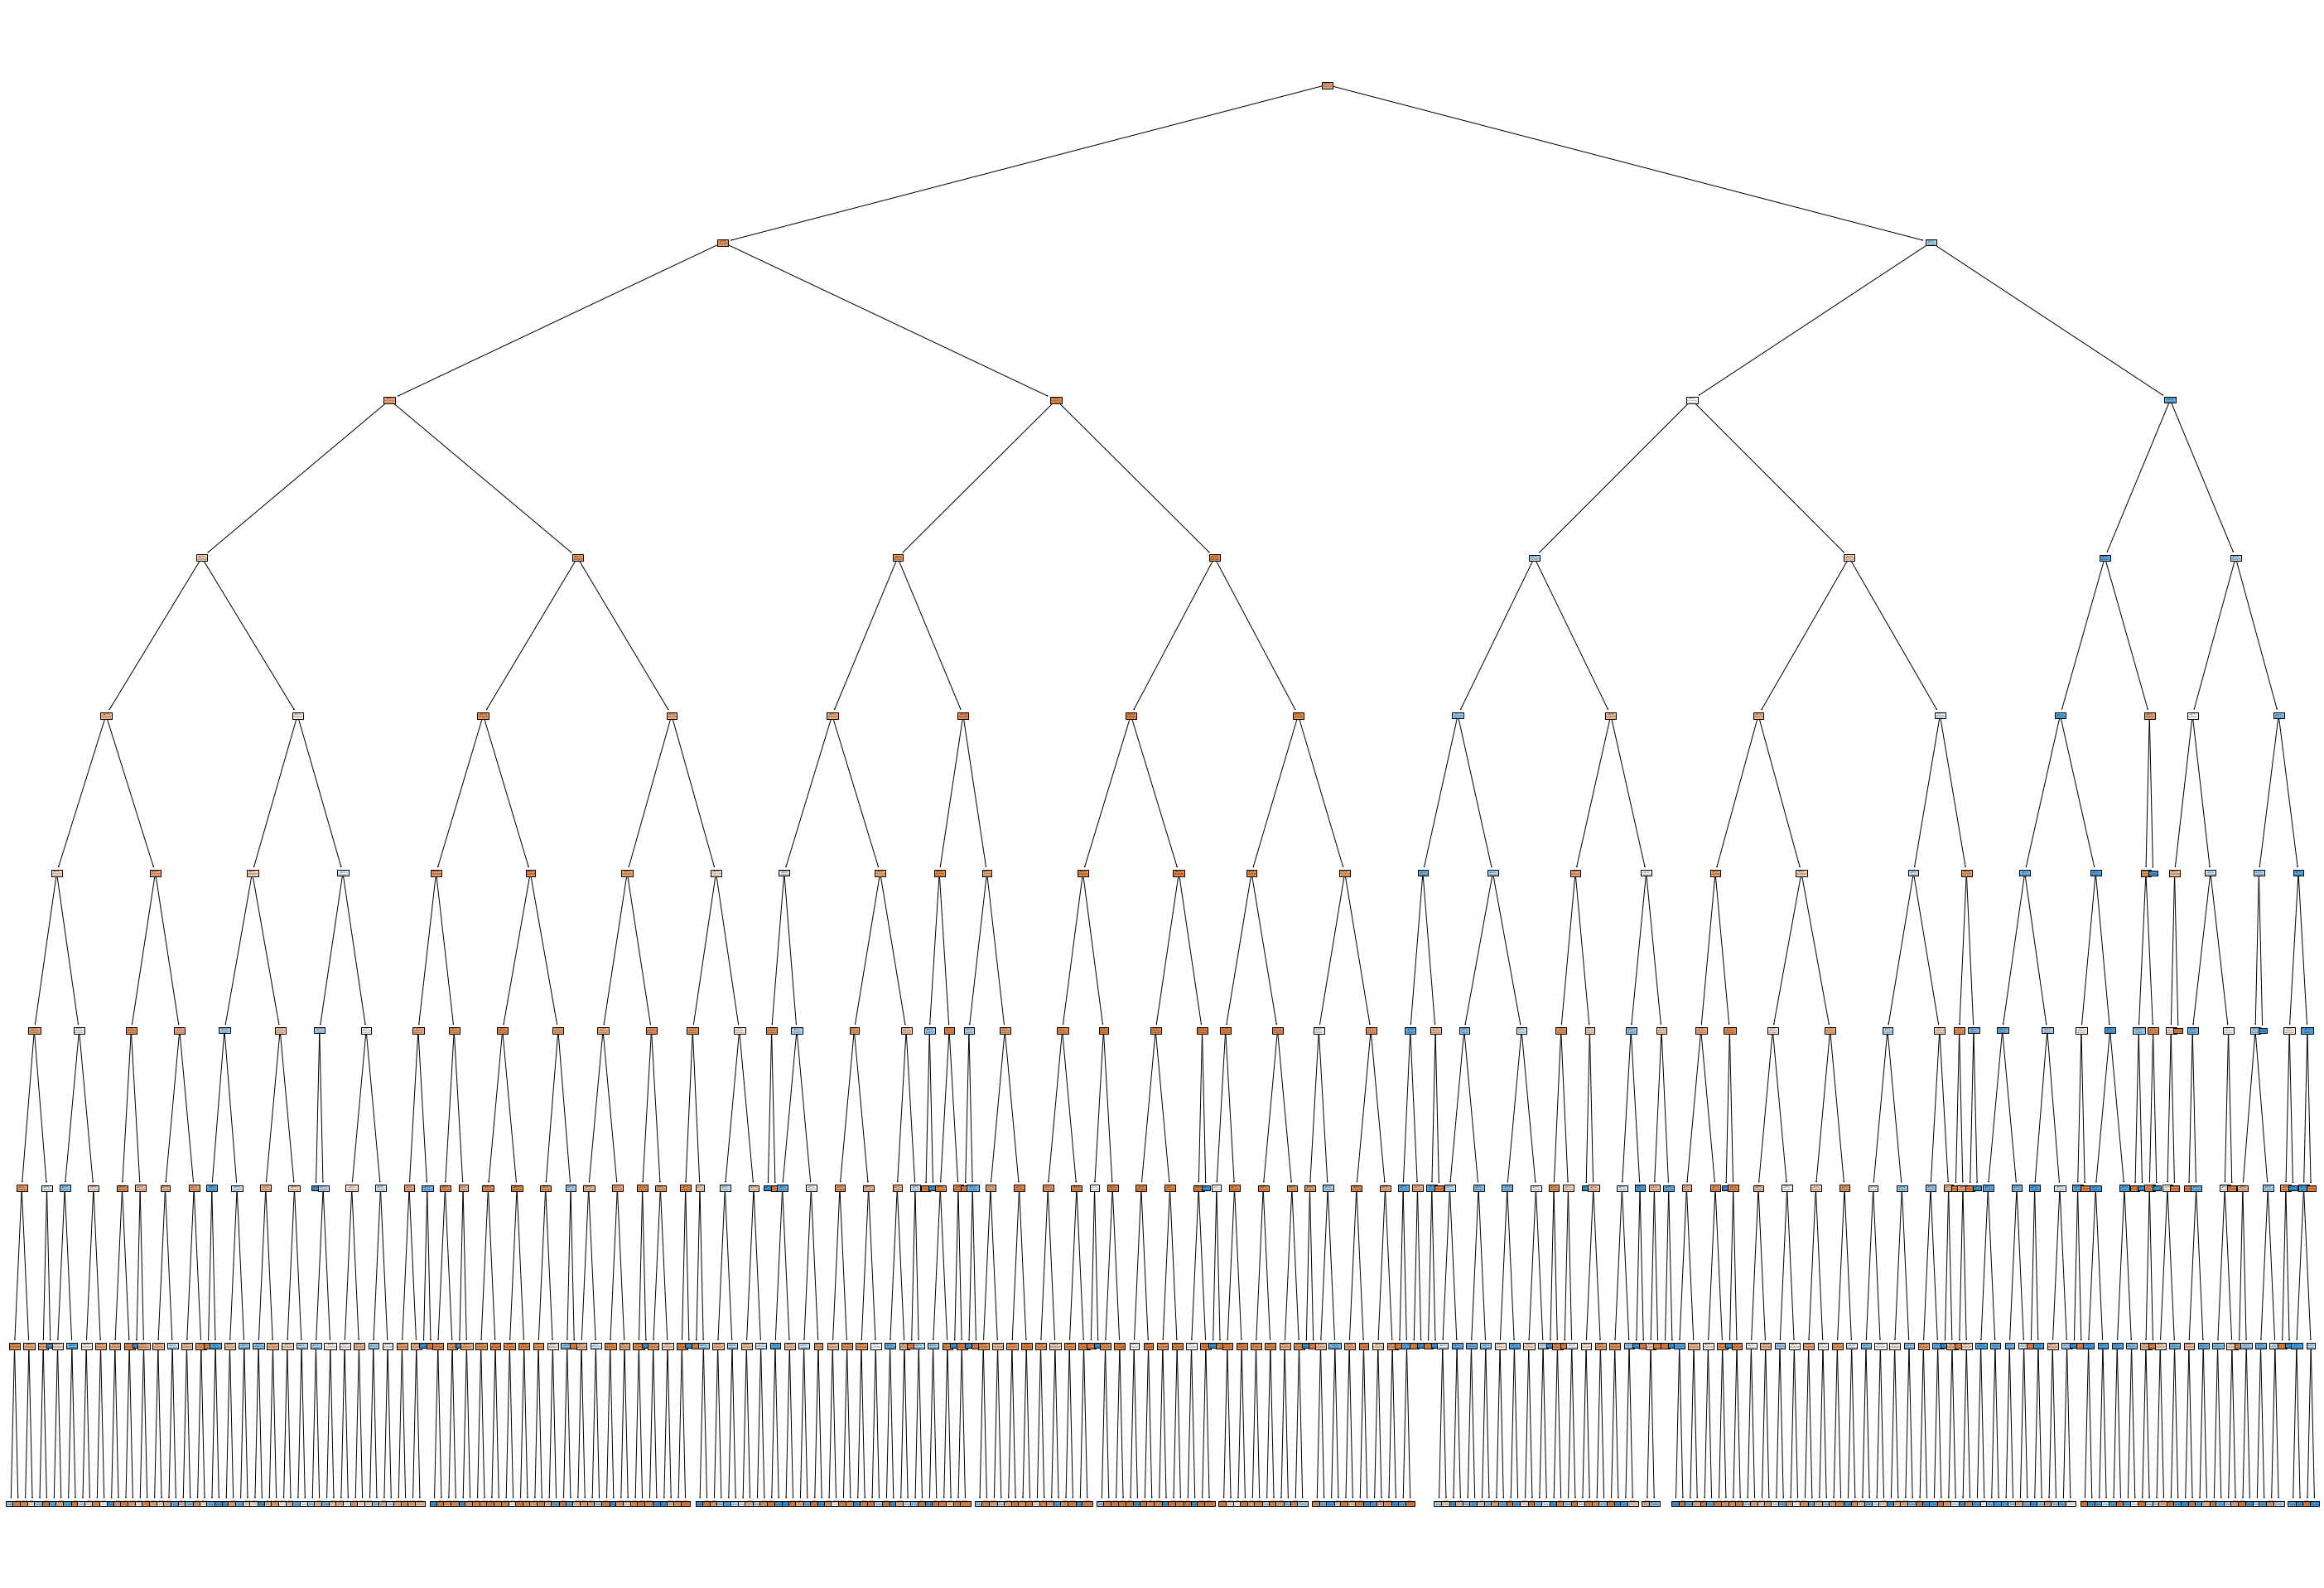

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,35))
plot_tree(tree,feature_names=X_train.columns,class_names=["não_choveu","choveu"],proportion=True,filled=True)
plt.show()

  0%|          | 0/19 [00:00<?, ?it/s]

7

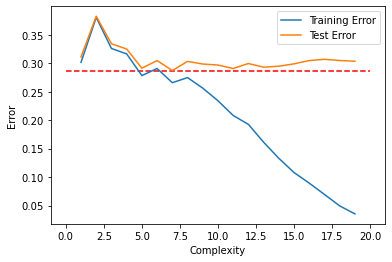

In [23]:
from sklearn.metrics import roc_auc_score
from tqdm.auto import tqdm
complexity = []
error_test = []
error_train = []
for K in tqdm(range(1, 20)):
    complexity.append(K)
    knn = DecisionTreeClassifier(max_depth=K)
    knn.fit(X_train, y_train)
    error_train.append(1 - roc_auc_score(y_train, knn.predict(X_train)))
    error_test.append(1 - roc_auc_score(y_test, knn.predict(X_test)))
plt.plot(complexity, error_train, '-', label='Training Error')
plt.plot(complexity, error_test, '-', label='Test Error')
plt.hlines(min(error_test), 0, 20, colors='red', linestyles='dashed')
plt.xlabel('Complexity')
plt.ylabel('Error')
plt.legend()
error_test.index(min(error_test))+1

In [24]:
pd.DataFrame(tree.feature_importances_,X_train.columns)

,0
mintemp,0.010595
maxtemp,0.006976
rainfall,0.038296
evaporation,0.011938
sunshine,0.155862
humidity9am,0.016016
humidity3pm,0.544791
pressure9am,0.017807
pressure3pm,0.124356
cloud9am,0.003336


In [25]:
!pip install lightgbm --user

In [26]:
from lightgbm import LGBMClassifier

In [27]:
lgb=LGBMClassifier(max_depth=9, n_estimators=200, colsample_bytree=.50, n_jobs=-1)
lgb.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.5, max_depth=9, n_estimators=200)

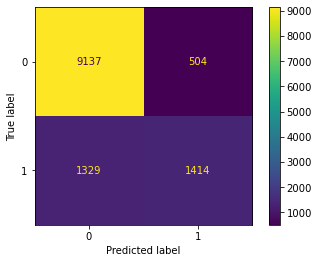

In [28]:
plot_confusion_matrix(lgb, X_test, y_test, values_format='.0f')
plt.grid(False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

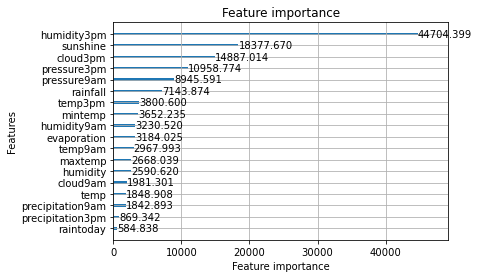

In [29]:
from lightgbm import plot_importance
plot_importance(lgb, importance_type='gain')

In [30]:
#Tentativa  4
X=rain[[ 'rainfall','sunshine', 'humidity3pm','pressure9am', 'pressure3pm', 'cloud3pm']]
y=rain['raintomorrow']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

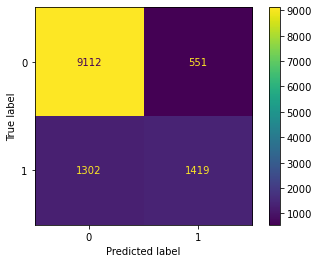

In [32]:
lgb=LGBMClassifier(max_depth=9, n_estimators=200, colsample_bytree=.5, n_jobs=-1)
lgb.fit(X_train,y_train)
plot_confusion_matrix(lgb, X_test, y_test, values_format='.0f')
plt.grid(False)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)

X_std_train=scaler.transform(X_train)
X_std_test=scaler.transform(X_test)

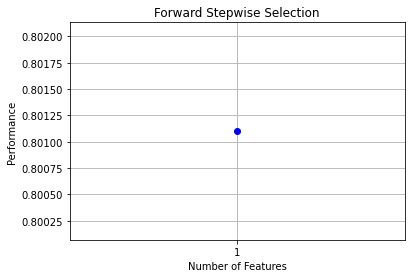

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
selector = SFS(tree, k_features=1, scoring='roc_auc')
selector.fit(X_std_train, y_train)
fig = plot_sfs(selector.get_metric_dict(), kind='std_err')
plt.title('Forward Stepwise Selection')
plt.grid()
plt.show()

In [35]:
selector.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.79968852, 0.80391718, 0.79880284, 0.80254673, 0.80054816]),
  'avg_score': 0.8011006869182136,
  'feature_names': ('1',)}}

In [36]:
X_train.var()

rainfall        48.860123
sunshine        14.129123
humidity3pm    408.557201
pressure9am     48.551480
pressure3pm     48.148406
cloud3pm         7.016282
dtype: float64

In [37]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest
selector = VarianceThreshold(50)
selector.fit(X_train)
X_train.columns[selector.get_support()]

Index(['humidity3pm'], dtype='object')

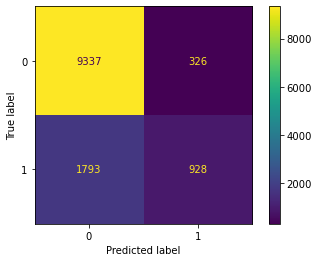

In [38]:
lgb=LGBMClassifier(max_depth=9, n_estimators=200, colsample_bytree=.5, n_jobs=-1)
lgb.fit(X_train[X_train.columns[selector.get_support()]],y_train)
plot_confusion_matrix(lgb, X_test[X_test.columns[selector.get_support()]], y_test, values_format='.0f')
plt.grid(False)

#2nd Try

In [39]:
pd0=pd.read_csv('data/rain_data_aus.csv')
pd1=pd.read_csv('data/wind_table_01.csv')
pd2=pd.read_csv('data/wind_table_02.csv')
pd3=pd.read_csv('data/wind_table_03.csv')
pd4=pd.read_csv('data/wind_table_04.csv')
pd5=pd.read_csv('data/wind_table_05.csv')
pd6=pd.read_csv('data/wind_table_06.csv')
pd7=pd.read_csv('data/wind_table_07.csv')
pd8=pd.read_csv('data/wind_table_08.csv')

In [40]:
pd0.shape

(142193, 23)

In [41]:
pd1.columns

Index(['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am',
       'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm'],
      dtype='object')

In [42]:
list_columns= ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am',
       'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']
pd1.columns = list_columns
pd2.columns = list_columns
pd3.columns = list_columns
pd4.columns = list_columns
pd5.columns = list_columns
pd6.columns = list_columns
pd7.columns = list_columns
pd8.columns = list_columns

In [43]:
wind = pd.concat([pd1,pd2,pd3,pd4,pd5,pd6,pd7,pd8])

In [44]:
wind.head()

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0


In [45]:
wind.drop_duplicates()

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0
...,...,...,...,...,...,...,...,...
22188,2017-06-25,Perth,E,26.0,SE,SE,4.0,11.0
22189,2017-06-25,SalmonGums,SE,15.0,SSE,E,7.0,6.0
22190,2017-06-25,Walpole,SSW,20.0,WNW,SSW,6.0,6.0
22191,2017-06-25,Hobart,NW,50.0,NNW,NNW,17.0,28.0


In [46]:
rain_wind=pd0.merge(wind,on=['date', 'location'])
rain_wind

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,28.400000,12,5.115360,0.089825,W,44.0,W,WNW,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,2.208569,10,21.497100,0.023477,WNW,44.0,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,38.000000,17,20.782859,0.027580,WSW,46.0,W,WSW,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,21.200000,8,12.028646,0.023962,NE,24.0,SE,E,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,41.600000,9,11.883546,0.220164,W,41.0,ENE,NW,7.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,27.200000,9,19.715976,0.023350,NNW,22.0,SE,N,13.0,9.0
164382,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,30.800000,12,0.985551,0.007195,N,37.0,SE,WNW,9.0,9.0
164383,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,30.800000,12,0.985551,0.007195,N,37.0,SE,WNW,9.0,9.0
164384,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,51.0,24.0,1019.4,...,30.800000,15,4.381481,0.018811,SE,28.0,SSE,N,13.0,7.0


In [47]:
rain_wind=rain_wind.drop_duplicates()

In [48]:
rain_wind.isna().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
wind_gustdir         9330
wind_gustspeed       9270
wind_dir9am         10013
wind_dir3pm          3778
wind_speed9am        1348
wind_speed3pm        2630
dtype: int64

In [49]:
rain_wind=rain_wind.dropna()

In [50]:
wind

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0
...,...,...,...,...,...,...,...,...
22188,2017-06-25,Perth,E,26.0,SE,SE,4.0,11.0
22189,2017-06-25,SalmonGums,SE,15.0,SSE,E,7.0,6.0
22190,2017-06-25,Walpole,SSW,20.0,WNW,SSW,6.0,6.0
22191,2017-06-25,Hobart,NW,50.0,NNW,NNW,17.0,28.0


In [51]:
rain_wind.isna().sum()

date                0
location            0
mintemp             0
maxtemp             0
rainfall            0
evaporation         0
sunshine            0
humidity9am         0
humidity3pm         0
pressure9am         0
pressure3pm         0
cloud9am            0
cloud3pm            0
temp9am             0
temp3pm             0
raintoday           0
amountOfRain        0
raintomorrow        0
temp                0
humidity            0
precipitation3pm    0
precipitation9am    0
modelo_vigente      0
wind_gustdir        0
wind_gustspeed      0
wind_dir9am         0
wind_dir3pm         0
wind_speed9am       0
wind_speed3pm       0
dtype: int64

In [52]:
rain_wind['raintomorrow']=rain_wind['raintomorrow'].replace({'No':0,'Yes':1})
rain_wind['raintoday']=rain_wind['raintoday'].replace({'No':0,'Yes':1})

In [53]:
rain_wind.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'wind_gustdir', 'wind_gustspeed',
       'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm'],
      dtype='object')

In [54]:
X=rain_wind[['mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday','temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'wind_gustspeed', 'wind_speed9am', 'wind_speed3pm']]
y=rain_wind['raintomorrow']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
X_train.var()

mintemp              41.194659
maxtemp              48.724718
rainfall             48.768041
evaporation          13.945416
sunshine             14.122121
humidity9am         343.516943
humidity3pm         409.476209
pressure9am          47.741937
pressure3pm          47.165148
cloud9am              7.813203
cloud3pm              6.998571
temp9am              43.218342
temp3pm              46.868213
raintoday             0.172261
temp                104.857933
humidity            668.811789
precipitation3pm     10.061696
precipitation9am     25.027698
modelo_vigente        0.078369
wind_gustspeed      177.678772
wind_speed9am        68.780719
wind_speed3pm        71.960065
dtype: float64

In [57]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest
selector = VarianceThreshold(100)
selector.fit(X_train)
X_train.columns[selector.get_support()]

Index(['humidity9am', 'humidity3pm', 'temp', 'humidity', 'wind_gustspeed'], dtype='object')

In [58]:
X.isna().sum()

mintemp             0
maxtemp             0
rainfall            0
evaporation         0
sunshine            0
humidity9am         0
humidity3pm         0
pressure9am         0
pressure3pm         0
cloud9am            0
cloud3pm            0
temp9am             0
temp3pm             0
raintoday           0
temp                0
humidity            0
precipitation3pm    0
precipitation9am    0
modelo_vigente      0
wind_gustspeed      0
wind_speed9am       0
wind_speed3pm       0
dtype: int64

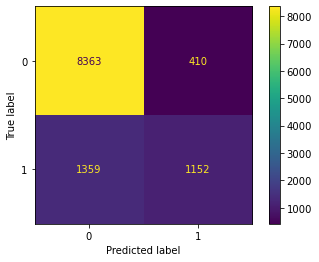

In [59]:
lgb=LGBMClassifier(max_depth=9, n_estimators=200, colsample_bytree=.5, n_jobs=-1)
lgb.fit(X_train[X_train.columns[selector.get_support()]],y_train)
plot_confusion_matrix(lgb, X_test[X_test.columns[selector.get_support()]], y_test, values_format='.0f')
plt.grid(False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

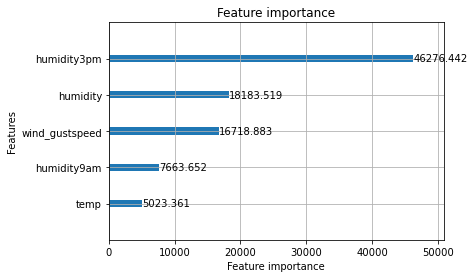

In [60]:
from lightgbm import plot_importance
plot_importance(lgb, importance_type='gain')